#### 
In the following code I want to read the output of Pylag 
Extract the lat/lon from the files 
Plot  them in a geographic map 

# Psudcode
1) I want to read alll nc files from the following path
2) extract the value of latitudes/longitude
3) plot the latitude/longitude values with an arrow

In [3]:
# required imports
import os
import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# read all files in the directory
directory = '/home/samin/data/FVCOME_OUTPUT/simulations/horon/output/moredata/202301'
file_list = [f for f in os.listdir(directory) if f.endswith(".nc")]
# Loop through each file and plot it on a different subplot for i, f in enumerate(file_list):
file_path = os.path.join(directory, f)
# Open the netcdf file and extract the data
ds = xr.open_dataset(file_path)
#data = ds["lat"].values


SyntaxError: invalid syntax (1778069856.py, line 9)

In [1]:
# Read the data 
import xarray as xr
path_to_data = '/home/samin/data/FVCOME_OUTPUT/simulations/horon/output/moredata/202301/pylag_2.nc'
ds = xr.open_dataset(path_to_data)

In [32]:
drop_variables=['siglay','siglev']

directory = '/home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA/202306/Fvcome_houron_estuary_20230601.t00z.nc'
ds = xr.open_dataset(directory, decode_times= False, drop_variables=drop_variables)

In [33]:
import xarray as xr
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs

/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


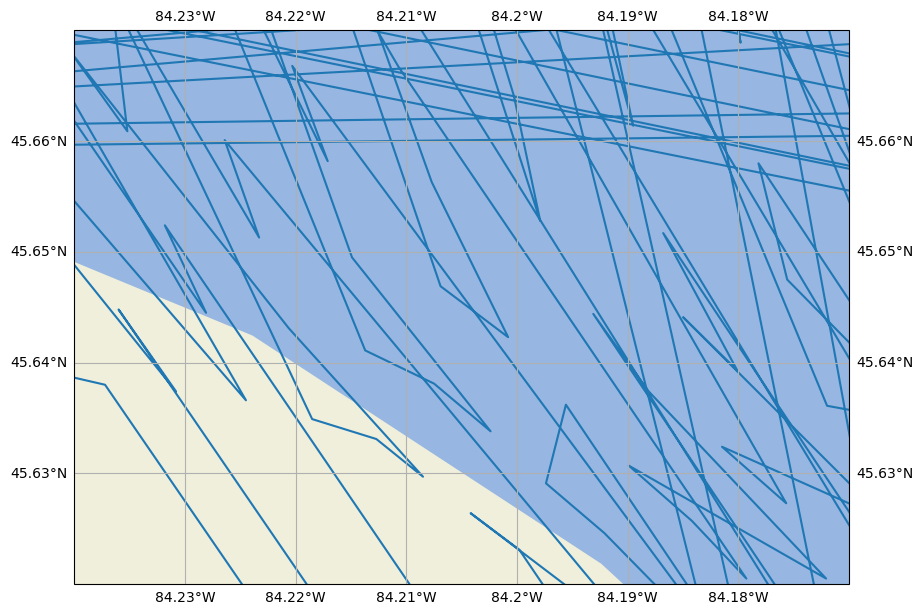

In [37]:
# read bathymetry data
# plot it
bathy = -ds.variables['h'][:]
lon = ds.variables['lon'][:]
lat = ds.variables['lat'][:]

# plot bathymetry data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
extents = np.array([275.76,275.83, 45.62,45.67], dtype=float)
ax. plot(lon, lat, bathy, transform=ccrs.PlateCarree())
ax.set_extent(extents)
ax.coastlines(resolution='10m')
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.LAKES)
ax.add_feature(cfeat.RIVERS)
ax.gridlines(draw_labels=True)

In [28]:
ds2 = ds.sel(time=slice('2023-01-01T00:00:00', '2023-01-01T23:00:00'))
u = ds2['u'].values
v = ds2['v'].values
lat = ds2['lat'].values
lon = ds2['lon'].values

In [27]:
ds2

<xarray.Dataset>
Dimensions:             (nele: 171377, node: 90806, three: 3, time: 0,
                         maxnode: 11, maxelem: 9, four: 4, siglay: 20,
                         siglev: 21)
Coordinates:
    lon                 (node) float32 272.0 272.0 272.0 ... 276.2 276.2 276.2
    lat                 (node) float32 44.53 44.53 44.53 ... 43.63 43.63 43.63
    lonc                (nele) float32 ...
    latc                (nele) float32 ...
  * time                (time) float32 
Dimensions without coordinates: nele, node, three, maxnode, maxelem, four,
                                siglay, siglev
Data variables: (12/50)
    nprocs              int32 ...
    partition           (nele) int32 ...
    x                   (node) float32 ...
    y                   (node) float32 ...
    xc                  (nele) float32 ...
    yc                  (nele) float32 ...
    ...                  ...
    atmos_press         (time, node) float32 ...
    wet_nodes           (time, node) int32 ...
    wet_cells           (time, nele) int32 ...
    wet_nodes_prev_int  (time, node) int32 ...
    wet_cells_prev_int  (time, nele) int32 ...
    wet_cells_prev_ext  (time, nele) int32 ...
Attributes: (12/14)
    title:                       LMHOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.3
    history:                     model started at: 01/06/2023   02:12
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: lmhofs late...
    River_Forcing:               THERE ARE 12 RIVERS IN THIS MODEL.\nRIVER IN...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  FVCOM periodic surface precip forcing:\nFILE...

MemoryError: Unable to allocate 30.7 GiB for an array with shape (90806, 90806) and data type float32

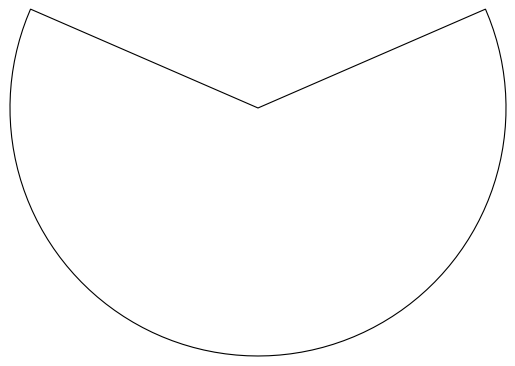

In [31]:
ds2 = ds.sel(time=slice('2023-01-01T00:00:00', '2023-01-01T23:00:00'))
u = ds2['u'].values
v = ds2['v'].values
lat = ds2['lat'].values
lon = ds2['lon'].values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=cartopy.crs.LambertConformal())
ax.quiver(lon, lat, u, v, transform=cartopy.crs.PlateCarree())


In [26]:
# Extract lat/lon
lat = ds['latitude'].values
lon = ds['longitude'].values

KeyError: 'latitude'

In [11]:
# define some constant
num_step = 72
time = ds.time.values
dt =time[1]-time[0]
dt = dt*3600*12*3

In [13]:
#create an empty numpy array for the  U,V
#and position of PARTICLES
uparticle=np.zeros((num_step,1))
vparticle=np.zeros((num_step,1))
xparticle=np.zeros((num_step,1))
yparticle=np.zeros((num_step,1))

In [21]:
#initial condition
#we set the fisrt position of particles 
xparticle[0] = lat[0,0]
yparticle[0]=lon[0,0]

In [22]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import random

/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/root/miniconda3/envs/pylag

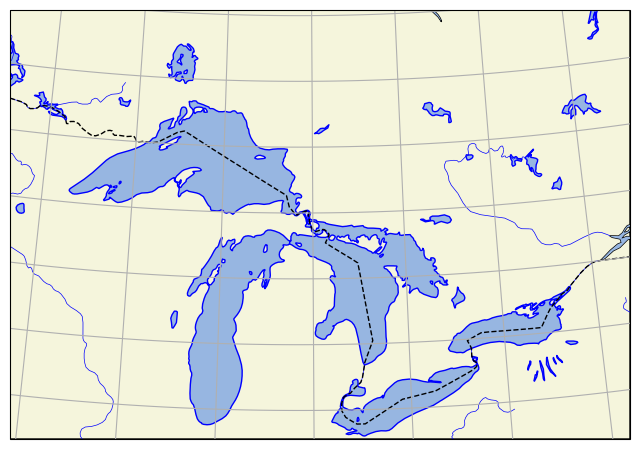

In [24]:
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.epsg(3174))

ax.plot(xparticle,yparticle,marker='<',markersize='5',color='r')  # didn't use transform, but looks ok..
ax.gridlines()
ax.set_global()
resol = '50m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='b', facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(land, facecolor='beige')
ax.add_feature(ocean, linewidth=0.2 )
ax.add_feature(lakes)
ax.add_feature(rivers, linewidth=0.5)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)
    

TypeError: GeoAxes.quiver() missing 2 required positional arguments: 'u' and 'v'

/root/miniconda3/envs/pylag/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


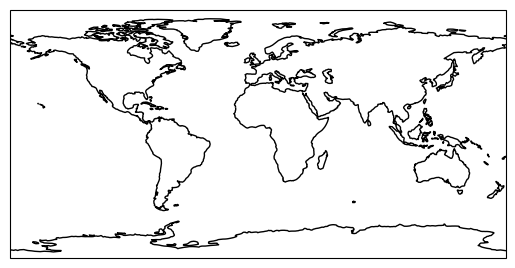

In [10]:
# Plot the data 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
# Create a geographic map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

# Plot arrows
quiver = ax.quiver(lon, lat, np.zeros_like(lon), np.zeros_like(lat), scale=1, scale_units='xy')

# Customize plot as needed

# Show the plot
plt.show()